# MA0218 Lab Quiz

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Used to cycle colors
from itertools import cycle

In [3]:
data = pd.read_csv('quizData(1).csv')
data.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


---

## Problem 1: Exploratory Analysis

#### a) Printing of the statistical description for the predictor variables in the data (Variance, Skewness, Kurtosis and Entropy).

In [4]:
data.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


In [5]:
for i in data:
    if i == "Banknote":
        break
    print("Statistical description for '{}':\n".format(i))
    print(data[i].describe())
    print("\n\n")

Statistical description for 'Variance':

count    1000.000000
mean        0.170628
std         2.820315
min        -7.042100
25%        -1.941250
50%         0.119660
75%         2.460275
max         6.563300
Name: Variance, dtype: float64



Statistical description for 'Skewness':

count    1000.000000
mean        1.724250
std         5.938027
min       -13.773100
25%        -1.916200
50%         2.140700
75%         6.573575
max        12.951600
Name: Skewness, dtype: float64



Statistical description for 'Kurtosis':

count    1000.000000
mean        1.452808
std         4.462049
min        -5.261300
25%        -1.674350
50%         0.561365
75%         3.444400
max        17.927400
Name: Kurtosis, dtype: float64



Statistical description for 'Entropy':

count    1000.000000
mean       -1.224837
std         2.108555
min        -8.548200
25%        -2.532775
50%        -0.620265
75%         0.376710
max         2.449500
Name: Entropy, dtype: float64





#### a) Plotting of standard statistical distributions for each of the predictor variables.

distplot of 'Variance':


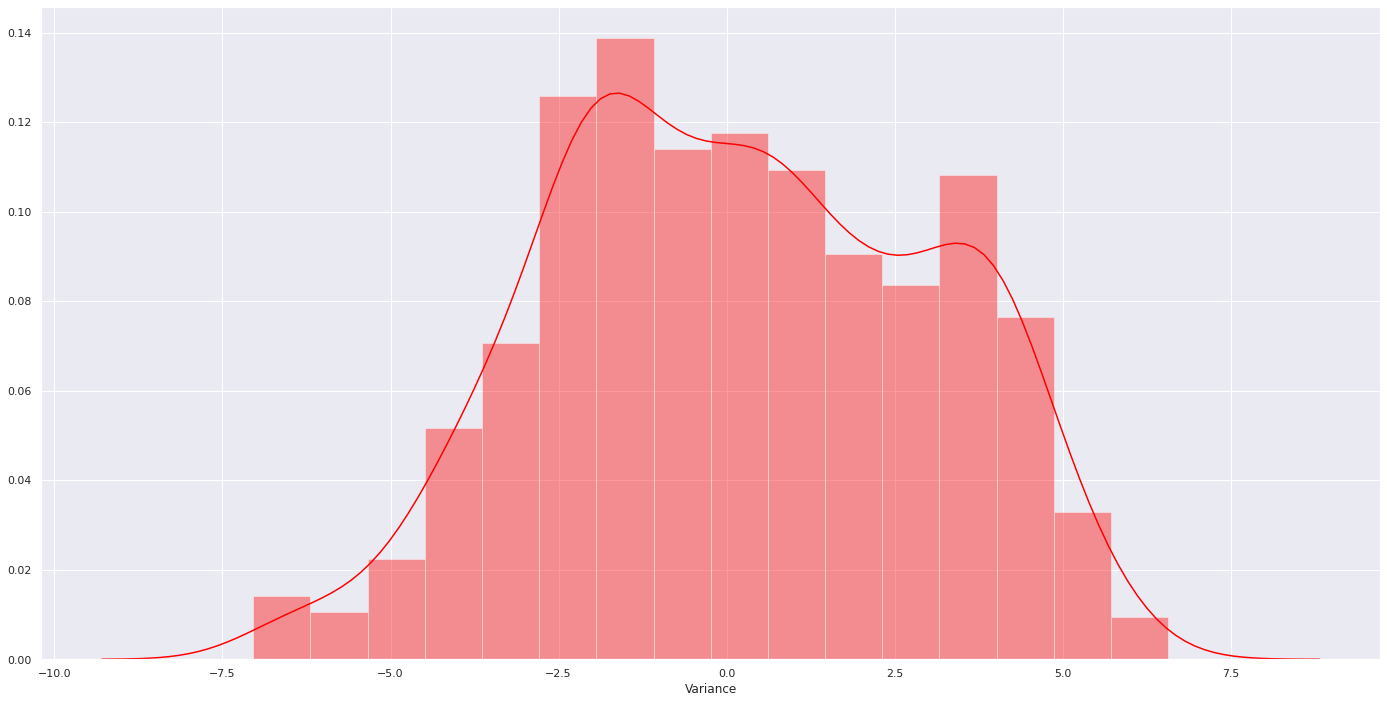




distplot of 'Skewness':


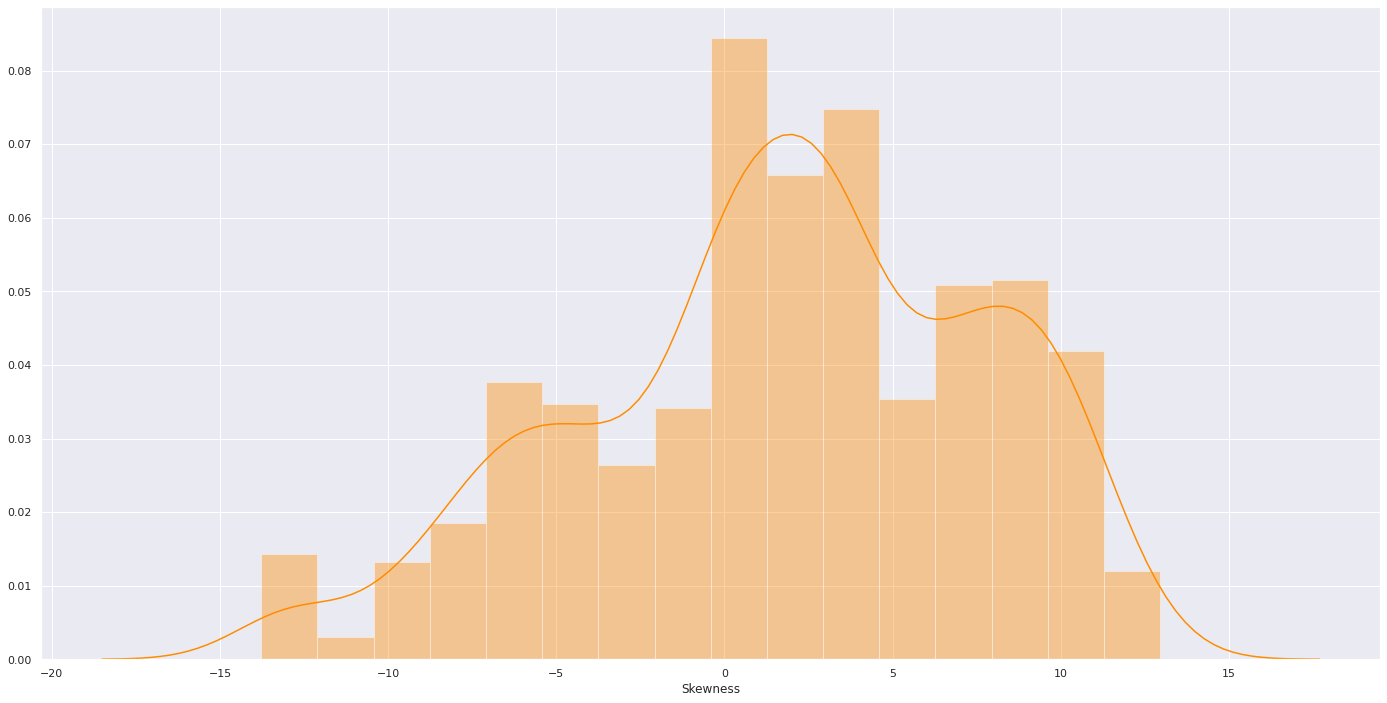




distplot of 'Kurtosis':


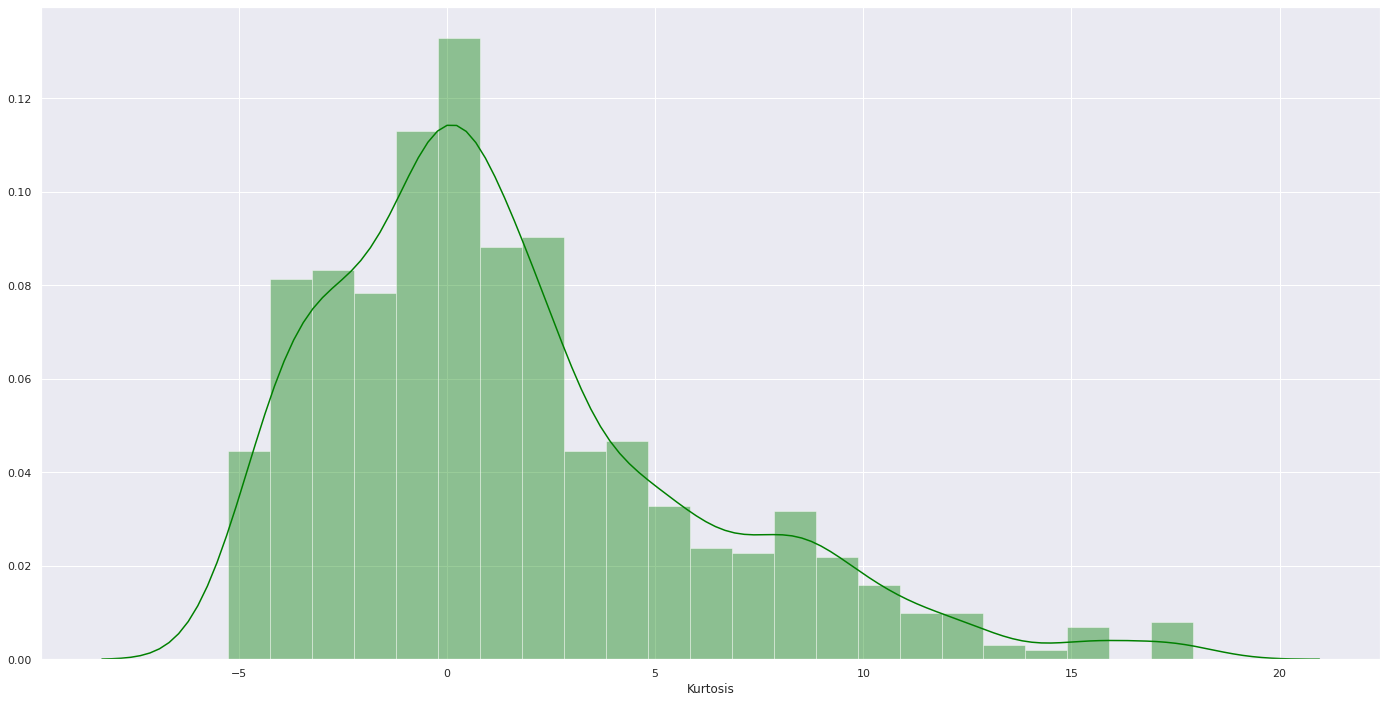




distplot of 'Entropy':


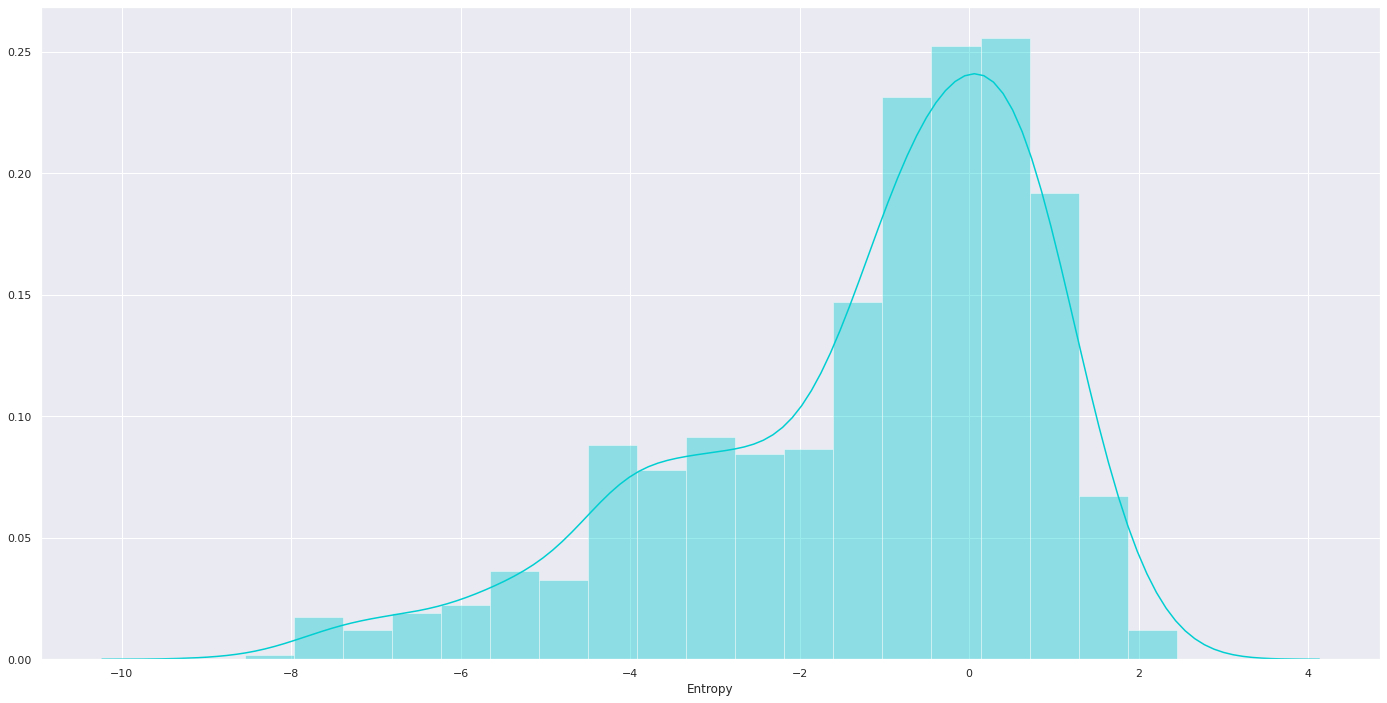

In [6]:
COLORS = cycle(['red', 'darkorange', 'green', 'darkturquoise', 'darkviolet','darkred','mediumvioletred','palevioletred',\
                        'orangered','magenta','darkmagenta','darkslateblue','limegreen','darkgreen',\
                        'darkcyan','cyan'])
for i in data:
    if i == "Banknote":
        break
    print("distplot of '{}':".format(i))
    f, axes = plt.subplots(1, 1, figsize=(24, 12))
    sb.distplot(data[i], color = next(COLORS))
    plt.show()
    if i != 'Entropy':
        print("\n\n")

violinplot of 'Variance':


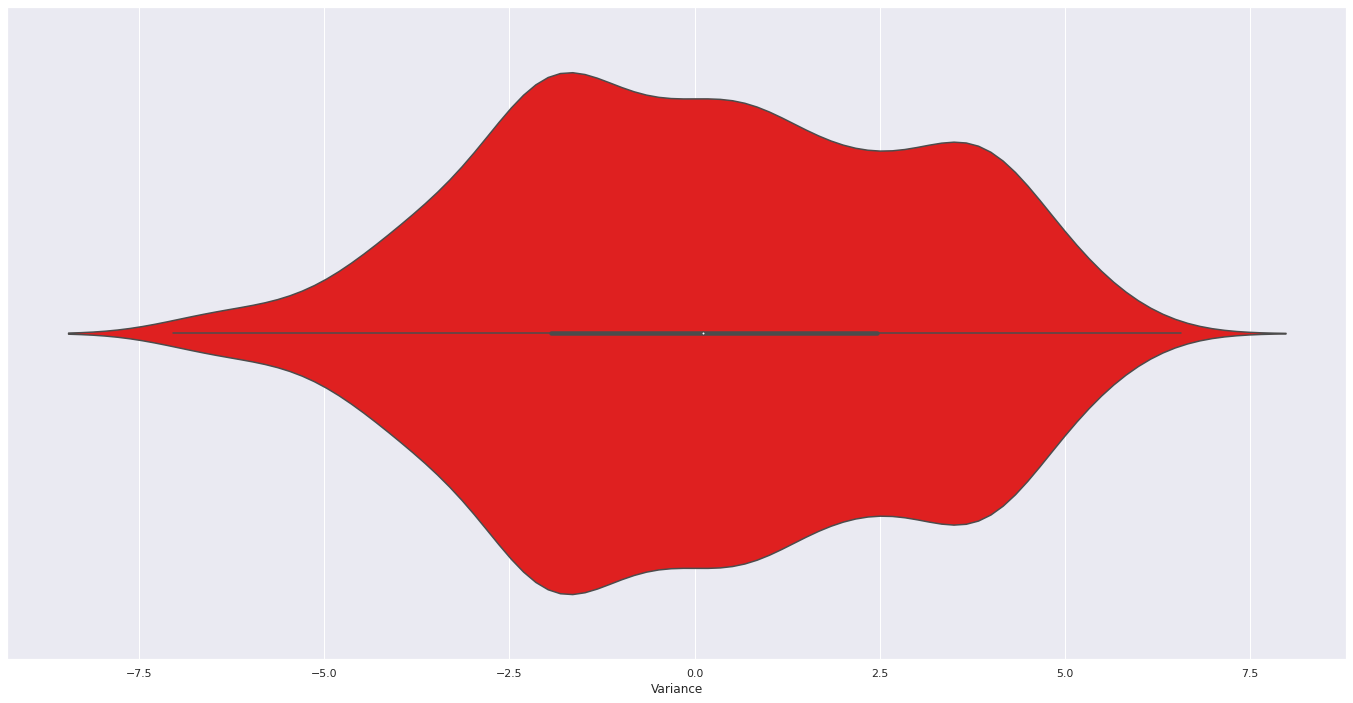




violinplot of 'Skewness':


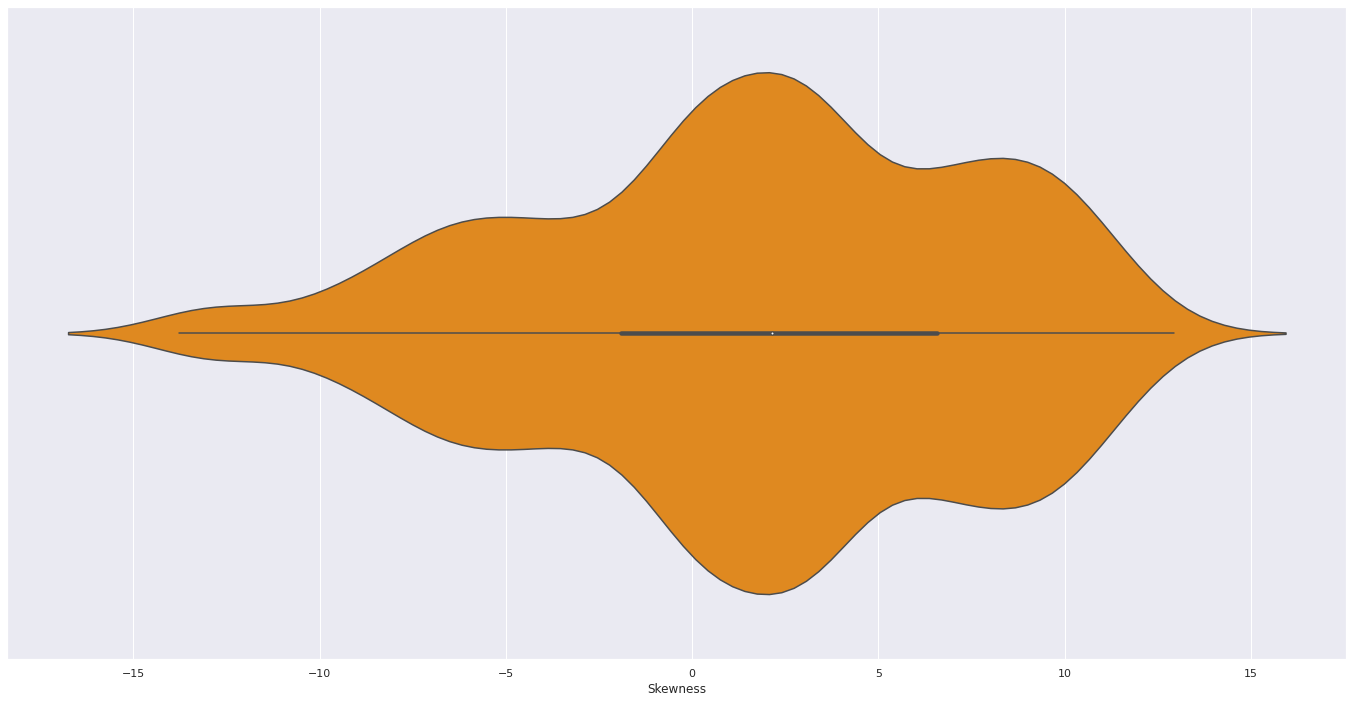




violinplot of 'Kurtosis':


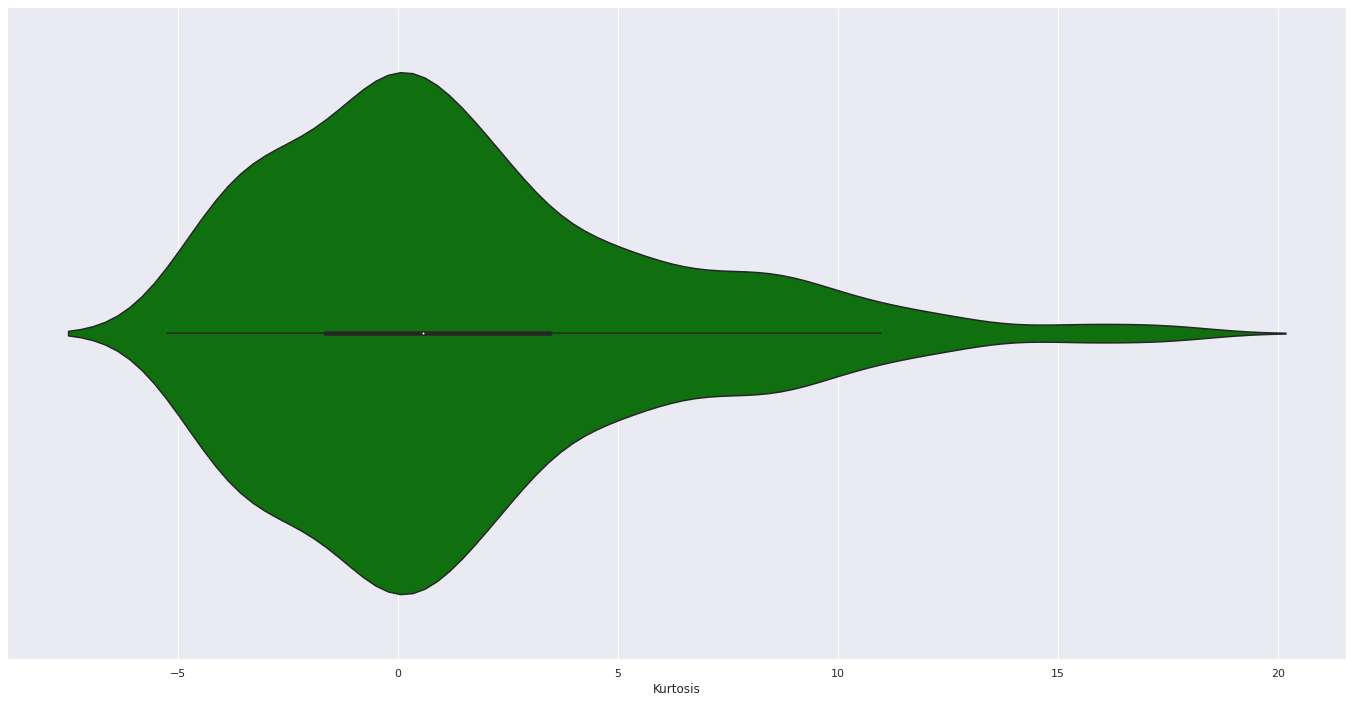




violinplot of 'Entropy':


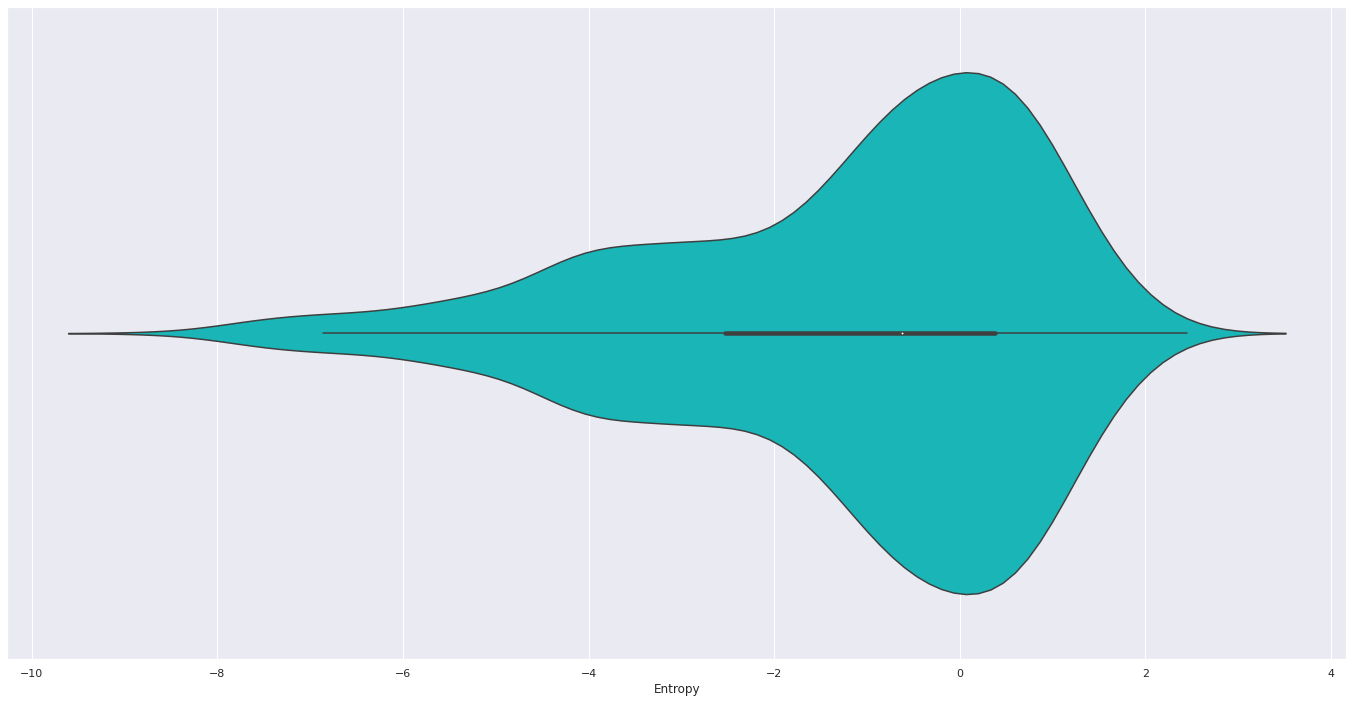

In [7]:
COLORS = cycle(['red', 'darkorange', 'green', 'darkturquoise', 'darkviolet','darkred','mediumvioletred','palevioletred',\
                        'orangered','magenta','darkmagenta','darkslateblue','limegreen','darkgreen',\
                        'darkcyan','cyan'])
for i in data:
    if i == "Banknote":
        break
    print("violinplot of '{}':".format(i))
    f, axes = plt.subplots(1, 1, figsize=(24, 12))
    sb.violinplot(data[i], color = next(COLORS))
    plt.show()
    if i != 'Entropy':
        print("\n\n")

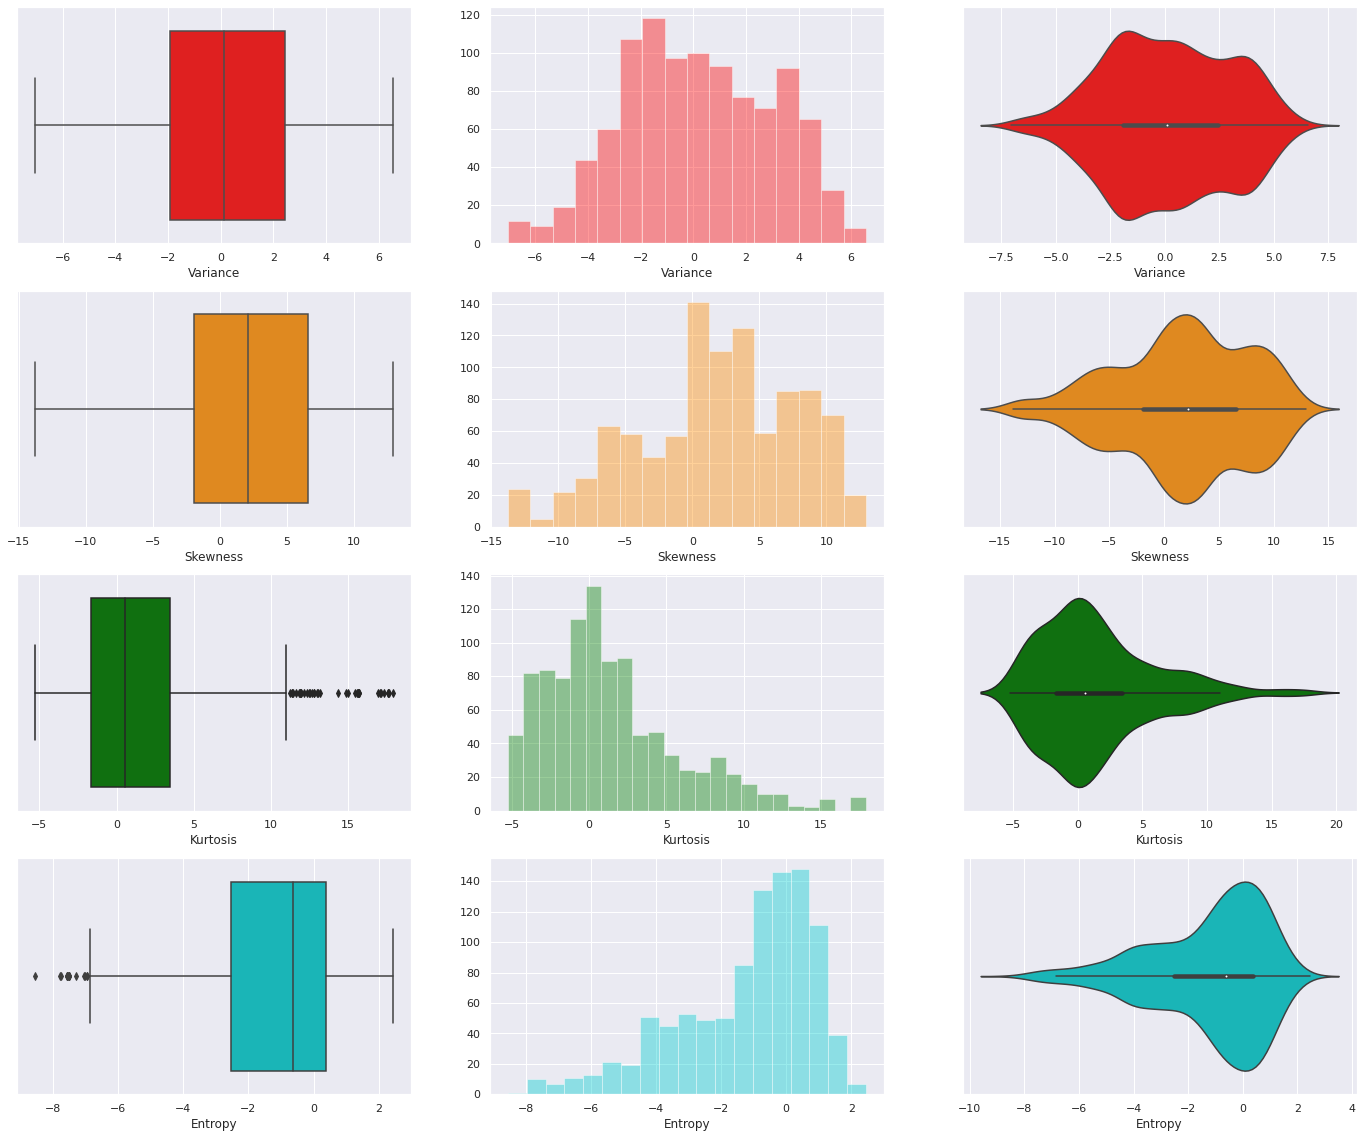

In [8]:
f, axes = plt.subplots(4, 3, figsize=(24, 20))

COLORS = cycle(['red', 'darkorange', 'green', 'darkturquoise', 'darkviolet','darkred','mediumvioletred','palevioletred',\
                        'orangered','magenta','darkmagenta','darkslateblue','limegreen','darkgreen',\
                        'darkcyan','cyan'])
x = 0
for i in data:
    if i == "Banknote":
        break
    color = next(COLORS)
    sb.boxplot(data[i], orient = "h", ax = axes[x,0], color = color)
    sb.distplot(data[i], kde = False, ax = axes[x,1], color = color)
    sb.violinplot(data[i], ax = axes[x,2], color = color)
    
    x += 1

#### b) Counting the number of outliers (Points outside the range [Q1 – 1.5 * (Q3 – Q1), Q3 + 1.5 * (Q3 – Q1)]  are outliers).

In [9]:
print("Number of outliers for:")
outliers = []
for i in data:
    if i == "Banknote":
        break
    Q1 = data[i].describe()[4]
    Q3 = data[i].describe()[6]
    k = (Q3-Q1)*1.5
    lowerbound = Q1 - k
    upperbound = Q3 + k
    count = 0
    for num in data[i]:
        if (num > upperbound or num < lowerbound): 
            count+=1
    outliers.append([count,i])
    
outliers.sort(reverse = True)
for i in outliers:
    print("{:<12} = {}".format(i[1],i[0]))

Number of outliers for:
Kurtosis     = 37
Entropy      = 16
Variance     = 0
Skewness     = 0


As seen above, the variable 'Kurtosis' has the most outliers (37 outliers)

#### c) Printing the statistical description and plotting of the standard statistical distributions for the response variable – Banknote.


Statistical description for 'Banknote':

count        1000
unique          2
top       Genuine
freq          500
Name: Banknote, dtype: object


catplot of 'Banknote'


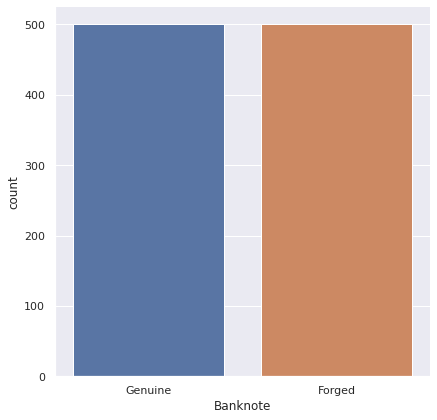

In [10]:
print("Statistical description for 'Banknote':\n")
print(data["Banknote"].describe())
print("\n\ncatplot of 'Banknote'")
sb.catplot(x = "Banknote", data = data, kind = "count", 
           order = data["Banknote"].value_counts().index, height = 6)
plt.show()

#### d) Finding the ratio of 'Genuine' : 'Forged' banknotes.

In [11]:
Genuine = 0
Forged = 0
for i in data["Banknote"]:
    if i == "Genuine":
            Genuine += 1
    else:
        Forged += 1
        
ratio = Forged/Genuine
print("Number of 'Genuine' banknotes: {}".format(Genuine))
print("Number of 'Forged' banknotes : {}".format(Forged))
print("Ratio of 'Genuine' : 'Forged' = 'Genuine'/'Genuine' : 'Forged'/'Genuine'")

print("\n\nTherefore, the ratio of 'Genuine' : 'Forged' = 1 : {:.2f}".format(ratio))

Number of 'Genuine' banknotes: 500
Number of 'Forged' banknotes : 500
Ratio of 'Genuine' : 'Forged' = 'Genuine'/'Genuine' : 'Forged'/'Genuine'


Therefore, the ratio of 'Genuine' : 'Forged' = 1 : 1.00


#### e) Visualizing the relationship of response variable "Banknote" with the numeric predictor variables using swarmplots.


Swarmplot of 'Banknote' against 'Variance':


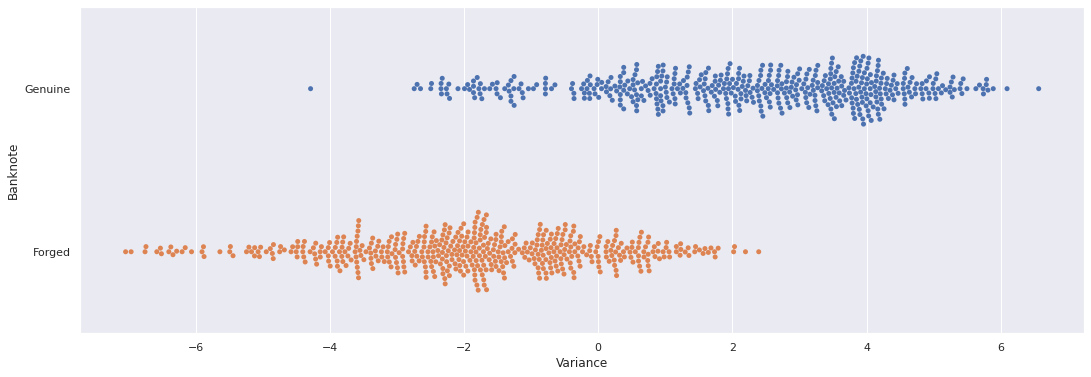





Swarmplot of 'Banknote' against 'Skewness':


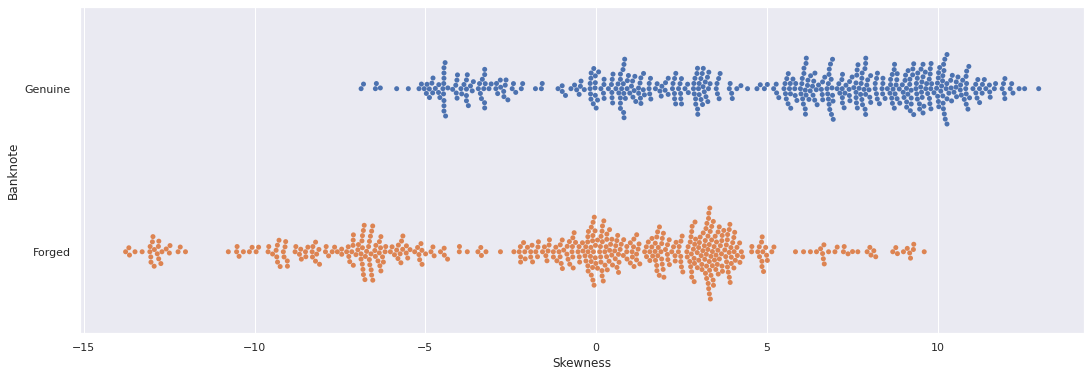





Swarmplot of 'Banknote' against 'Kurtosis':


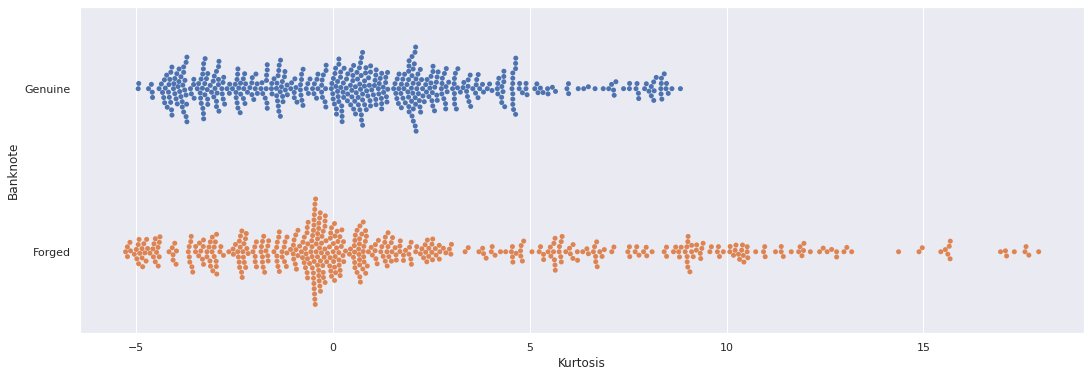





Swarmplot of 'Banknote' against 'Entropy':


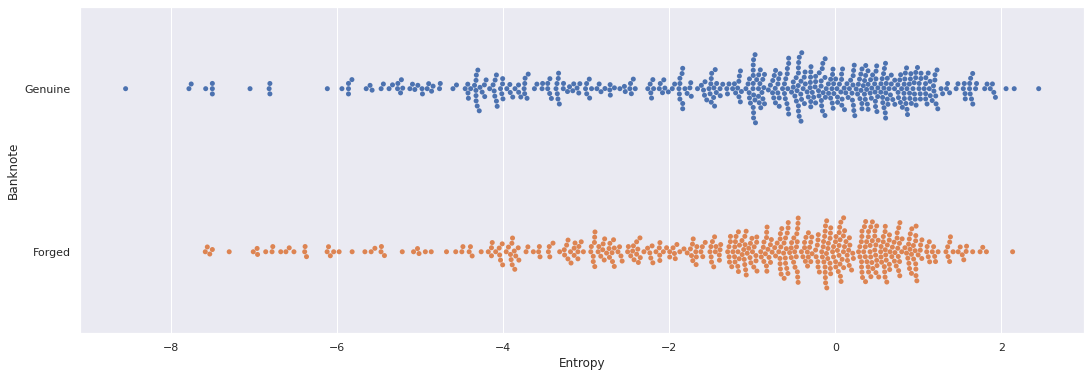

In [12]:
for i in data:
    if i == "Banknote":
        break
    print("\nSwarmplot of 'Banknote' against '{}':".format(i))
    f, axes = plt.subplots(1, 1, figsize=(18, 6))
    sb.swarmplot(x = i, y = "Banknote", data = data, orient = "h")
    plt.show()
    if i != 'Entropy':
        print("\n\n")

---

## Problem 2: Uni-Variate Decision Tree

#### a) Partitioning of the data randomly into Train and Test sets; 80% for Train and 20% for Test.

In [13]:
from sklearn.model_selection import train_test_split

datasize,_ = data.shape
testsize = int(datasize/100*20)


traindata,testdata = train_test_split(data, test_size = testsize, random_state = 0)

# Check the sample sizes
print("Train Set :", traindata.shape)
print("Test Set  :", testdata.shape)

Train Set : (800, 5)
Test Set  : (200, 5)


#### a) Fitting four uni-variate Decision Tree models for Banknote against each of the four numeric predictor variables (Train set).

Decision Tree models for 'Banknote' against 'Variance':


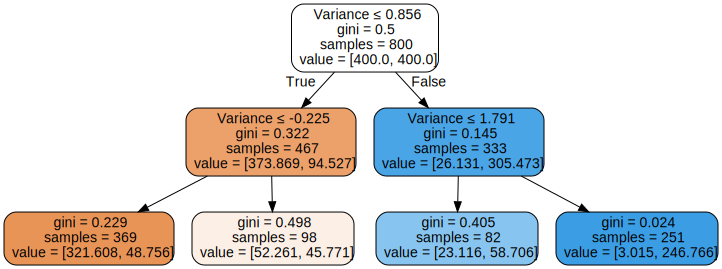





Decision Tree models for 'Banknote' against 'Skewness':


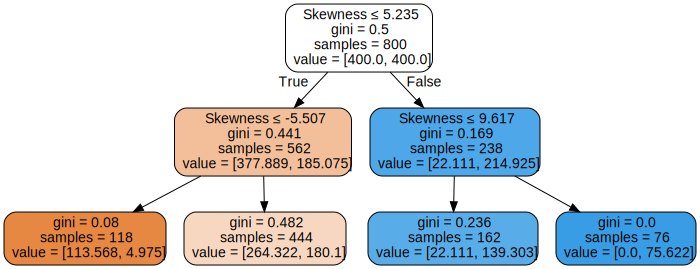





Decision Tree models for 'Banknote' against 'Kurtosis':


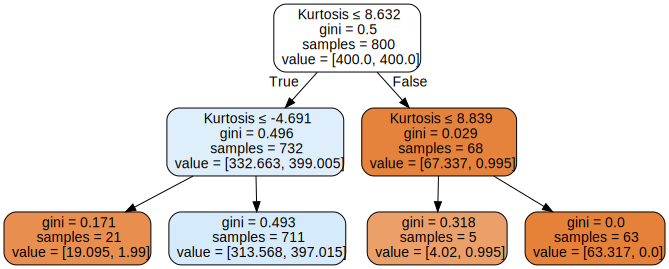





Decision Tree models for 'Banknote' against 'Entropy':


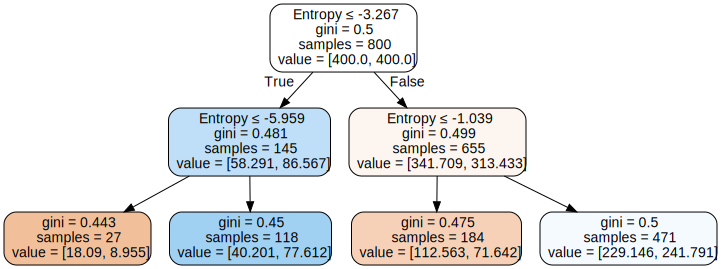

In [14]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

dectree = DecisionTreeClassifier(max_depth = 2,class_weight = "balanced")

for i in traindata:
    if i == "Banknote":
        break
    print("Decision Tree models for 'Banknote' against '{}':".format(i))
    x_train = pd.DataFrame(traindata[i])
    y_train = pd.DataFrame(traindata['Banknote'])
    dectree.fit(x_train,y_train)

    treedot = export_graphviz(dectree,                                      # the model
                              feature_names = x_train.columns,              # the features 
                              out_file = None,                              # output file
                              filled = True,                                # node colors
                              rounded = True,                               # make pretty
                              special_characters = True)                    # postscript

    graphviz.Source(treedot)
    display(graphviz.Source(treedot))
    if i != 'Entropy':
        print("\n\n\n")

#### b) Predicting of Banknote using the tree model on both Train and Test data.
##### Predicting on Train data set:

Predicting 'Banknote' using 'Variance':


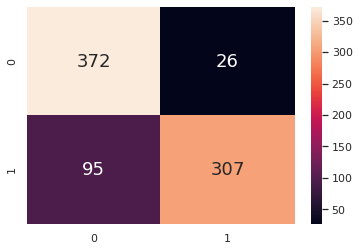

TN = 372, FP = 26
FN = 95 , TP = 307

Classification Accuracy = 0.84875





Predicting 'Banknote' using 'Skewness':


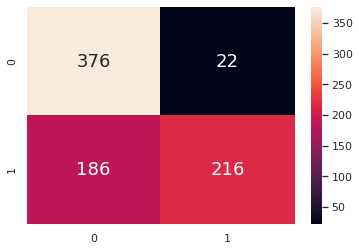

TN = 376, FP = 22
FN = 186, TP = 216

Classification Accuracy = 0.74





Predicting 'Banknote' using 'Kurtosis':


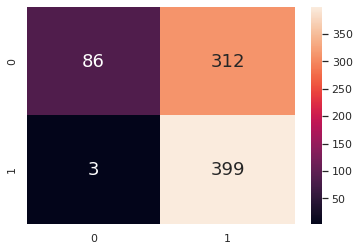

TN = 86 , FP = 312
FN = 3  , TP = 399

Classification Accuracy = 0.60625





Predicting 'Banknote' using 'Entropy':


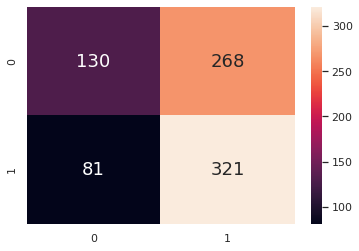

TN = 130, FP = 268
FN = 81 , TP = 321

Classification Accuracy = 0.56375



In [15]:
from sklearn.metrics import confusion_matrix

train_class = {}
train_pred = {}

for i in traindata:
    if i == "Banknote":
        break
        
    print("Predicting 'Banknote' using '{}':".format(i))
    x_train = pd.DataFrame(traindata[i])
    y_train = pd.DataFrame(traindata['Banknote'])
    dectree.fit(x_train,y_train)
    
    y_train_pred = dectree.predict(x_train)
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    [TN,FP],[FN,TP]= confusion_matrix(y_train,y_train_pred)
    plt.show()
    print("TN = {:<3}, FP = {}\nFN = {:<3}, TP = {}".format(TN,FP,FN,TP))
    print("\nClassification Accuracy = {}\n".format(dectree.score(x_train, y_train)))
    train_class[i]= dectree.score(x_train, y_train)
    train_pred[i]= [TN,FP,FN,TP]
    if i != 'Entropy':
        print("\n\n\n")

##### Predicting on Test dataset:

Predicting 'Banknote' using 'Variance':


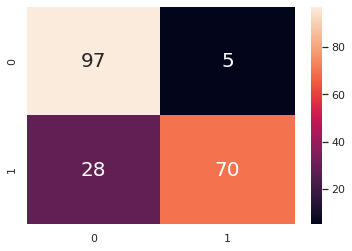

TN = 97 , FP = 5
FN = 28 , TP = 70

Classification Accuracy = 0.835





Predicting 'Banknote' using 'Skewness':


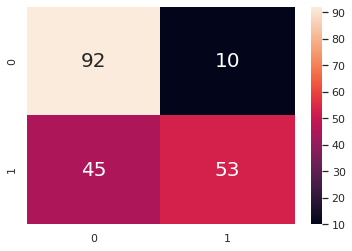

TN = 92 , FP = 10
FN = 45 , TP = 53

Classification Accuracy = 0.725





Predicting 'Banknote' using 'Kurtosis':


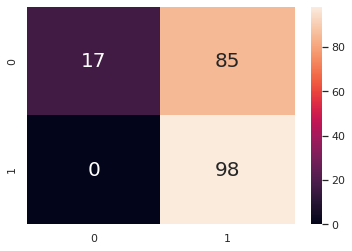

TN = 17 , FP = 85
FN = 0  , TP = 98

Classification Accuracy = 0.575





Predicting 'Banknote' using 'Entropy':


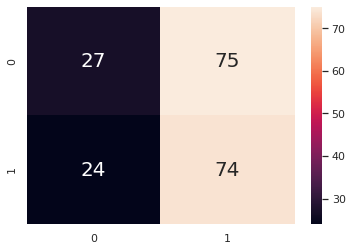

TN = 27 , FP = 75
FN = 24 , TP = 74

Classification Accuracy = 0.505



In [16]:
test_class = {}
test_pred = {}
for i in testdata:
    if i == "Banknote":
        break
        
    print("Predicting 'Banknote' using '{}':".format(i))
    x_test = pd.DataFrame(testdata[i])
    y_test = pd.DataFrame(testdata['Banknote'])
    x_train = pd.DataFrame(traindata[i])
    y_train = pd.DataFrame(traindata['Banknote'])
    dectree.fit(x_train,y_train)
    
    y_test_pred = dectree.predict(x_test)
   
    
    
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 20})
    [TN,FP],[FN,TP]= confusion_matrix(y_test,y_test_pred)
    plt.show()
    print("TN = {:<3}, FP = {}\nFN = {:<3}, TP = {}".format(TN,FP,FN,TP))
    print("\nClassification Accuracy = {}\n".format(dectree.score(x_test,y_test)))
    test_class[i]= dectree.score(x_test, y_test)
    test_pred[i]= [TN,FP,FN,TP]
    if i != 'Entropy':
        print("\n\n\n")

In [17]:
print("Classification Accuracy\n")
print("            Train      Test\n")
for i in train_class:
    print("{:<8}".format(i),end = ":  ")
    print("{:.5f}    {:.5f}\n".format(train_class[i],test_class[i]))

Classification Accuracy

            Train      Test

Variance:  0.84875    0.83500

Skewness:  0.74000    0.72500

Kurtosis:  0.60625    0.57500

Entropy :  0.56375    0.50500



As seen above, 'Variance' is the best in terms of predicting 'Banknote'. This is because its classification accuracy is the highest for both train and test. Furthermore, its train classification accuracy is similar to its test classification accuracy.

---

## Problem 3: Multi-Variate Decision Tree

#### a) Using the previously partitioned Train set to fit a multi-variate decision tree model for Banknote againts all 4 predictors.

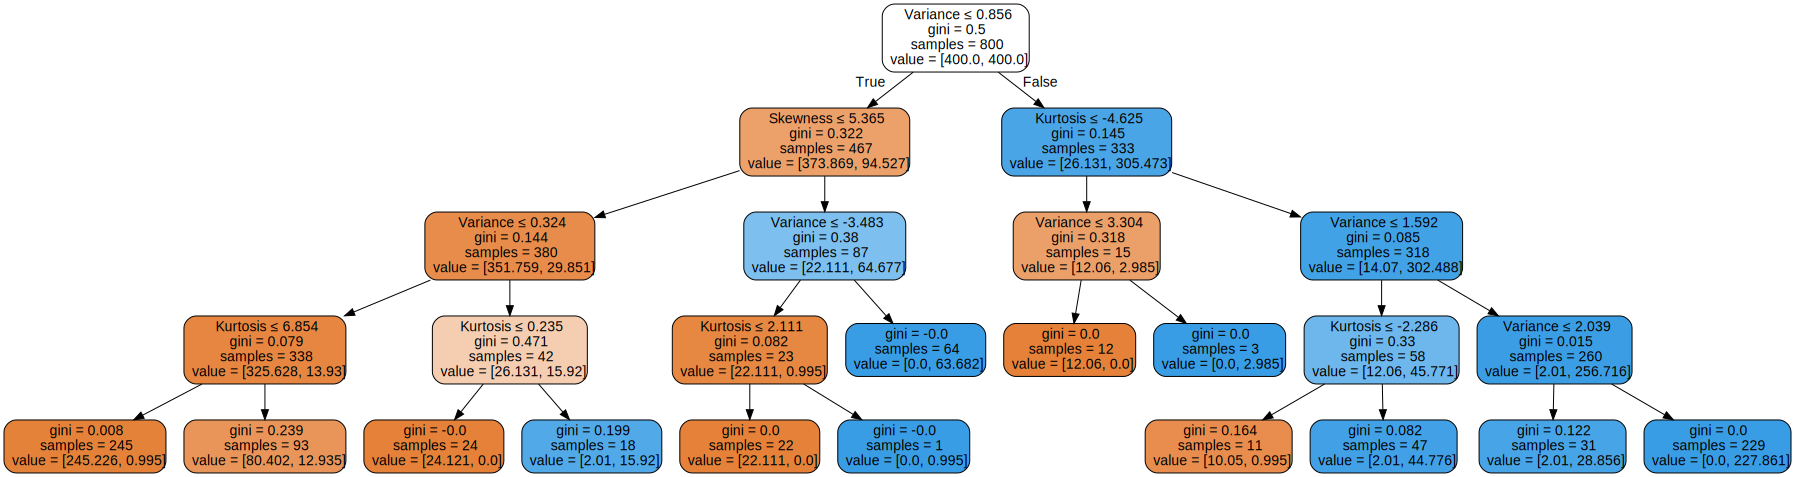

In [18]:
x_train = traindata[["Variance","Skewness","Kurtosis","Entropy"]]
y_train = traindata[["Banknote"]]
x_test = testdata[["Variance","Skewness","Kurtosis","Entropy"]]
y_test = testdata[["Banknote"]]

 
dectree = DecisionTreeClassifier(max_depth = 4, class_weight = "balanced")  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

#### b) Predicting of Banknote using the tree model on both Train and Test data.
##### Predicting on Train data set:

Predicting of 'Banknote':


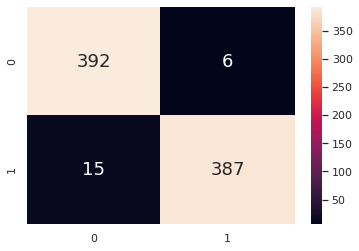

TN = 392, FP = 6
FN = 15 , TP = 387

Classification Accuracy = 0.97375



In [19]:
print("Predicting of 'Banknote':")

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

[TN,FP],[FN,TP]= confusion_matrix(y_train,y_train_pred)

print("TN = {:<3}, FP = {}\nFN = {:<3}, TP = {}".format(TN,FP,FN,TP))
print("\nClassification Accuracy = {}\n".format(dectree.score(x_train,y_train)))
train_class["Multi-variate"]= dectree.score(x_train, y_train)
train_pred["Multi-variate"]= [TN,FP,FN,TP]


##### Predicting on Test data set:

Predicting of 'Banknote':


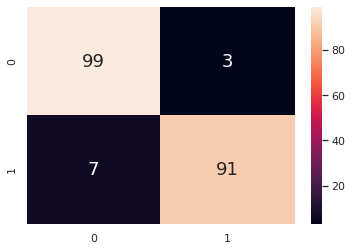

TN = 99 , FP = 3
FN = 7  , TP = 91

Classification Accuracy = 0.95



In [20]:
print("Predicting of 'Banknote':")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()


[TN,FP],[FN,TP]= confusion_matrix(y_test,y_test_pred)
plt.show()
print("TN = {:<3}, FP = {}\nFN = {:<3}, TP = {}".format(TN,FP,FN,TP))
print("\nClassification Accuracy = {}\n".format(dectree.score(x_test,y_test)))
test_class["Multi-variate"]= dectree.score(x_test, y_test)
test_pred["Multi-variate"]= [TN,FP,FN,TP]

#### c) Printing of FPR and FNR values calculated from each of the confusion matrices.
    “Genuine” is considered as Positive and “Forged” as Negative in this context.

In [21]:
train_pred["Multi-variate"]

[392, 6, 15, 387]

In [22]:
test_pred["Multi-variate"]

[99, 3, 7, 91]

In [23]:
#For train data
TN,FP,FN,TP = train_pred["Multi-variate"]
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
print("Train data:\nFPR = {:.5f}\nFNR = {:.5f}\n".format(FPR,FNR))

#For test data
TN,FP,FN,TP = test_pred["Multi-variate"]
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
print("Test data:\nFPR = {:.5f}\nFNR = {:.5f}".format(FPR,FNR))

Train data:
FPR = 0.01508
FNR = 0.03731

Test data:
FPR = 0.02941
FNR = 0.07143


#### d) Printing of FP and FN cases for both Train and Test data.
##### Train data:

In [24]:
traindata_ = traindata.reset_index()
traindata_.head()

,index,Variance,Skewness,Kurtosis,Entropy,Banknote
0,687,-3.11580,-8.62890,10.44030,0.971530,Forged
1,500,-1.39710,3.31910,-1.39270,-1.994800,Forged
2,332,3.55940,1.30780,1.29100,1.655600,Genuine
3,979,-2.28110,-0.85669,2.71850,0.044382,Forged
4,817,0.12126,0.22347,-0.47327,0.970240,Forged


In [25]:
count = 0
FPindex = []
FNindex = []
for i in y_train["Banknote"]:
    if i == "Forged" and y_train_pred[count] == "Genuine": ## False positive
        FPindex.append(count)
        
    if i == "Genuine" and y_train_pred[count] == "Forged": ## False negative
        FNindex.append(count)
    
    count += 1
    

False Positive Cases

In [26]:
traindata_.loc[FPindex]

,index,Variance,Skewness,Kurtosis,Entropy,Banknote
238,813,0.37637,-0.82358,0.78543,0.745240,Forged
382,831,0.74428,-3.77230,1.61310,1.575400,Forged
404,649,2.03100,1.85200,-3.01210,0.003003,Forged
450,655,1.56310,0.89599,-1.97020,0.654720,Forged
545,663,1.74250,3.68330,-4.01290,-1.720700,Forged
558,838,1.43780,0.66837,-2.02670,1.027100,Forged


False Negative Cases

In [27]:
traindata_.loc[FNindex]

,index,Variance,Skewness,Kurtosis,Entropy,Banknote
39,181,-0.11783,-1.578900,8.0300,-0.028031,Genuine
48,478,-1.77810,0.854600,7.1303,0.027572,Genuine
79,172,-1.69520,1.065700,8.8294,0.949550,Genuine
150,241,-1.39310,1.566400,7.5382,0.784030,Genuine
235,224,-0.36038,4.115800,3.1143,-0.371990,Genuine
241,178,-0.13144,-1.777500,8.3316,0.352140,Genuine
279,90,1.48060,7.637700,-2.7876,-1.034100,Genuine
284,374,-1.50550,0.070346,6.8681,-0.506480,Genuine
490,322,-1.73440,2.017500,7.7618,0.935320,Genuine
552,421,-1.14970,1.295400,7.7010,0.626270,Genuine


##### Test Data

In [28]:
testdata_ = testdata.reset_index()
testdata_.head()

,index,Variance,Skewness,Kurtosis,Entropy,Banknote
0,993,-2.5084,-0.22763,1.48800,1.20690,Forged
1,859,-4.6765,-5.66360,10.96900,-0.33449,Forged
2,298,1.1430,0.83391,5.45520,-0.56984,Genuine
3,553,-3.1128,-6.84100,10.74020,-1.01720,Forged
4,672,-1.6176,1.09260,-0.35502,-0.59958,Forged


In [29]:
testdata_.tail()

,index,Variance,Skewness,Kurtosis,Entropy,Banknote
195,679,-1.72790,-6.8410,8.94940,0.68058,Forged
196,722,-0.69745,-1.7672,-0.34474,-0.12372,Forged
197,215,6.09190,2.9673,-1.32670,1.45510,Genuine
198,653,-1.74900,-6.3320,6.09870,0.14266,Forged
199,150,4.54470,8.2274,-2.41660,-1.58750,Genuine


In [30]:
FPindex1 = []
FNindex2 = []
for i in range(len(y_test["Banknote"])):
    if y_test[i]["Banknote"] == "Forged" and y_test_pred[i] == "Genuine": ## False positive
        FPindex1.append(i)
        
    if y_test[i]["Banknote"] == "Genuine" and y_test_pred[i] == "Forged": ## False negative
        FNindex2.append(i)


KeyError: 0

In [ ]:
count = 0
FPindex = []
FNindex = []
for i in y_test["Banknote"]:
    if i == "Forged" and y_test_pred[count] == "Genuine": ## False positive
        FPindex.append(count)
        
    if i == "Genuine" and y_test_pred[count] == "Forged": ## False negative
        FNindex.append(count)
    
    count += 1
    

In [ ]:
print(FPindex,FPindex1)

False Positive Cases

In [ ]:
testdata_.loc[FPindex]

False Negative cases

In [ ]:
testdata_.loc[FNindex]

#### e) Predicting the category of bank notes.

In [ ]:
case1 = {'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}
case2 = {'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544}
case3 = {'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}
case4 = {'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}
case5 = {'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}

In [ ]:
v,s,k,e = 'Variance','Skewness','Kurtosis','Entropy'

cases = pd.DataFrame({
   'Variance': [case1[v],case2[v],case3[v],case4[v],case5[v]],
   'Skewness': [case1[s],case2[s],case3[s],case4[s],case5[s]],
   'Kurtosis': [case1[k],case2[k],case3[k],case4[k],case5[k]],
   'Entropy':  [case1[e],case2[e],case3[e],case4[e],case5[e]],
   })


In [ ]:
cases

In [ ]:
y_pred = dectree.predict(cases)

In [ ]:
results = pd.DataFrame({'Results' : y_pred})

In [ ]:
outcome = pd.concat([cases, results], axis=1)

In [ ]:
print("Outcome of prediction:")
outcome

In [ ]:
y_pred = dectree.predict(testdata_.loc[FPindex].drop(["index","Banknote"],axis=1))

In [ ]:
print(y_pred)
testdata_.loc[FPindex]

In [ ]:
y_pred = dectree.predict(testdata_.loc[FNindex].drop(["index","Banknote"],axis=1))

In [ ]:
print(y_pred)
testdata_.loc[FNindex]